In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import plotly.express as px
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/recent-earthquakes/earthquakes.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

           id  magnitude        type  \
0  us7000necw        4.8  earthquake   
1  tx2024shcj        5.1  earthquake   
2  ci40734823        3.7  earthquake   
3  tx2024scvz        3.9  earthquake   
4  us7000ndte        4.1  earthquake   

                                        title                 date  \
0         M 4.8 - 33 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
1         M 5.1 - 34 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
2                M 3.7 - 6 km N of Malibu, CA  2024-09-16T11:22:08   
3  M 3.9 - 58 km S of Whites City, New Mexico  2024-09-14T17:01:06   
4  M 4.1 - 60 km S of Whites City, New Mexico  2024-09-14T17:01:06   

            time        updated  \
0  1726534182289  1726583895255   
1  1726534182183  1726672002991   
2  1726485728190  1726637414586   
3  1726333266539  1726584426218   
4  1726333266382  1726334616179   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://eart

In [3]:
with open('/kaggle/input/recent-earthquakes/earthquakes_column_descriptors.txt', 'r') as file:
    column_descriptors = file.read()
print(column_descriptors)

Column Descriptors:
id: Unique identifier for each earthquake event.
magnitude: The strength of the earthquake on the Richter scale.
type: Type of seismic event (earthquake, explosion, etc.).
title: Title of the earthquake event (place and magnitude).
date: Date when the earthquake occurred.
time: Time when the earthquake occurred.
updated: Last updated timestamp for the event.
url: Link to the earthquake event's details.
detailUrl: Additional details URL.
felt: Number of people who reported feeling the earthquake.
cdi: Community Determined Intensity, how strongly the event was felt.
mmi: Modified Mercalli Intensity, scale used to measure earthquake intensity.
alert: Alert level (green, yellow, orange, red).
status: Status of the event (reviewed, automatic).
tsunami: Tsunami risk flag (0 = no risk, 1 = risk).
sig: Significance of the earthquake, based on magnitude and impact.
net: Network that detected the earthquake.
code: Code assigned by the network.
ids: IDs of other events related

In [4]:
cleaned_df = df.dropna()
print(cleaned_df.isnull().sum())

id                 0
magnitude          0
type               0
title              0
date               0
time               0
updated            0
url                0
detailUrl          0
felt               0
cdi                0
mmi                0
alert              0
status             0
tsunami            0
sig                0
net                0
code               0
ids                0
sources            0
types              0
nst                0
dmin               0
rms                0
gap                0
magType            0
geometryType       0
depth              0
latitude           0
longitude          0
place              0
distanceKM         0
placeOnly          0
location           0
continent          0
country            0
subnational        0
city               0
locality           0
postcode           0
what3words         0
timezone           0
locationDetails    0
dtype: int64


<div style="background-color: green; color: black; padding: 10px; border-radius: 10px; font-size: 24px;">
  EDA
</div>

In [5]:
print(cleaned_df.describe())

       magnitude          time       updated           felt        cdi  \
count  68.000000  6.800000e+01  6.800000e+01      68.000000  68.000000   
mean    4.466324  1.716965e+12  1.720941e+12    5996.588235   5.382353   
std     0.432873  8.407731e+09  6.833506e+09   22909.176254   0.914712   
min     3.500000  1.693191e+12  1.705147e+12      10.000000   4.000000   
25%     4.100000  1.708152e+12  1.714665e+12      82.500000   5.000000   
50%     4.440000  1.721876e+12  1.725126e+12     269.000000   5.000000   
75%     4.800000  1.723004e+12  1.726348e+12    2042.000000   6.000000   
max     5.220000  1.726534e+12  1.726672e+12  183786.000000   7.000000   

             mmi    tsunami          sig         nst       dmin        rms  \
count  68.000000  68.000000    68.000000   68.000000  68.000000  68.000000   
mean    5.294118   0.147059   592.323529   57.632353   0.142172   0.386324   
std     0.754268   0.356798   296.328753   45.568353   0.223281   0.287547   
min     4.000000   0.

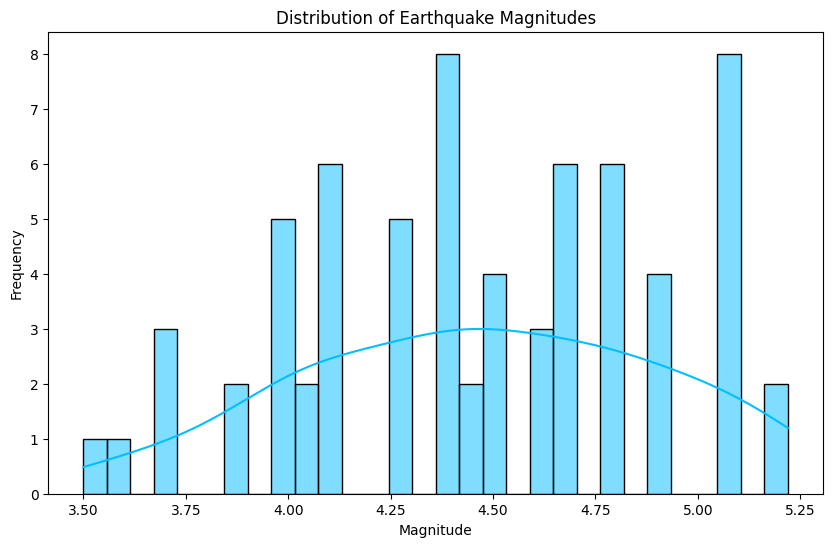

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['magnitude'], bins=30, kde=True, color='#00BFFF')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

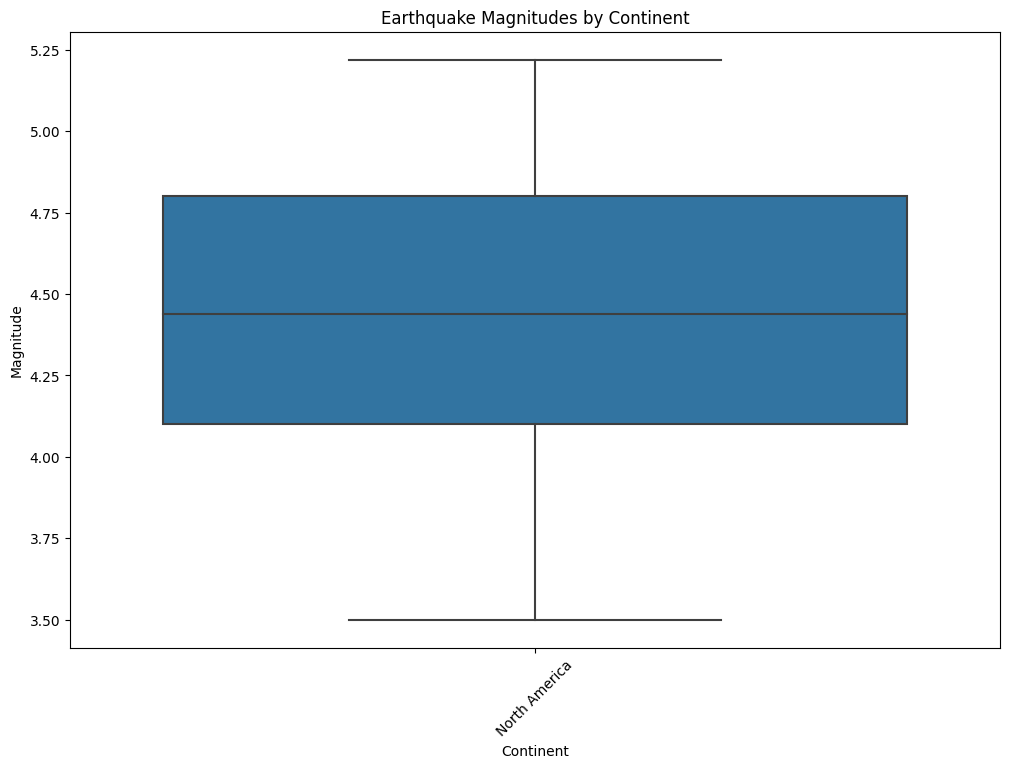

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='continent', y='magnitude', data=cleaned_df)
plt.title('Earthquake Magnitudes by Continent')
plt.xlabel('Continent')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.show()

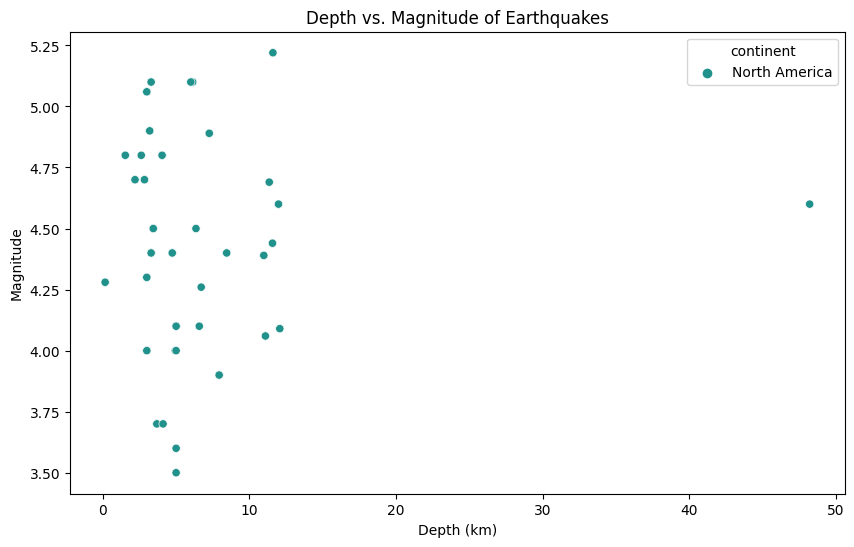

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='magnitude', hue='continent', data=cleaned_df, palette='viridis')
plt.title('Depth vs. Magnitude of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

# Credit:


https://www.kaggle.com/code/pavankumar4757/global-earthquake-map-interactive-insights